In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Обработанные данные.csv', sep=',')

In [4]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
df.head(2)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction,Date,Age_Group,Signup_Weekday,Signup_Weekend,Overall_Satisfaction,Days_of_the_week
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18,Neutral or Dissatisfied,2022-10-20,Young,3,0,54,Thursday
1,5047,Male,Disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6,Neutral or Dissatisfied,2022-10-08,Young,5,1,32,Saturday


In [7]:
encoder = OrdinalEncoder()
df[["Gender_encoded", "Customer_Type_encoded", "Type_of_Travel_encoded", "Class_encoded", "Satisfaction_encoded","Age_Group_encoded"]] = encoder.fit_transform(df[["Gender", "Customer Type", "Type of Travel", "Class", "Satisfaction", "Age_Group"]])


In [8]:
X = df.drop(['id', 'Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction', 'Date', 'Age_Group', 'Days_of_the_week','Satisfaction_encoded', 'Overall_Satisfaction'], axis=1)  # Признаки
y = df["Satisfaction_encoded"]  # Целевая переменная

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)

In [9]:
smote = SMOTE(
    sampling_strategy='auto',  # Автоматически балансируем классы (выравниваем их количества)
    random_state=42  # Фиксируем случайность для воспроизводимости
)

# Применяем SMOTE к обучающим данным (добавляем синтетические примеры)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [10]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_valid_scaled = scaler.transform(X_valid)
# Была попытка масштабировать данные, так как очень долго GridSearchCV работал, но, похоже это было сделано неверно.

In [11]:
def predict_results(model, X_train, X_valid, y_train, y_valid):
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_valid)
    
    accuracy = accuracy_score(y_valid, y_pred)  
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    
    ConfusionMatrixDisplay.from_estimator(model, X_valid, y_valid)
    plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr_model = LogisticRegression(
    penalty="l2",        # Регуляризация (L1, L2, Elastic Net)
    max_iter=5000,       # Количество итераций для нахождения весов
    random_state=42,      # Фиксация случайности для воспроизводимости
)

In [14]:
# param_grid1 = {
#     'penalty': ['l1', 'l2'],
#     'C': np.logspace(-4, 4, 10),
#     'max_iter': [2500, 3000]
# }

# grid_search = GridSearchCV(
# estimator=lr_model,
# param_grid=param_grid1,
# cv=3, # 5-fold кросс-валидация
# scoring='accuracy', # Метрика для оптимизации
# verbose=2, # Подробный вывод процесса
# n_jobs=-1, # Использовать все доступные ядра CPU
# return_train_score=True # Возвращать метрики на тренировочной выборке
# )

# # Запуск поиска
# grid_search.fit(X, y)

# # Получение лучшей модели и параметров
# best_lr_model = grid_search.best_estimator_
# best_params = grid_search.best_params_
# print(f"Лучшие параметры: {best_params}")
# print(f"Лучшая кросс-валидационная точность: {grid_search.best_score_:.4f}")

Accuracy: 0.8728, Precision: 0.8634, Recall: 0.8293, F1-score: 0.8460


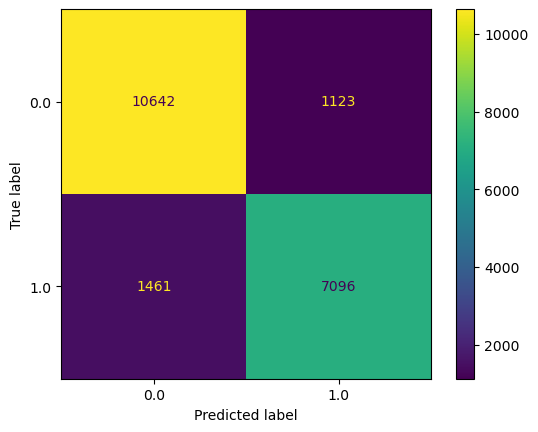

In [15]:
predict_results(lr_model, X_train, X_valid, y_train, y_valid)

Accuracy: 0.8629, Precision: 0.8262, Recall: 0.8539, F1-score: 0.8398


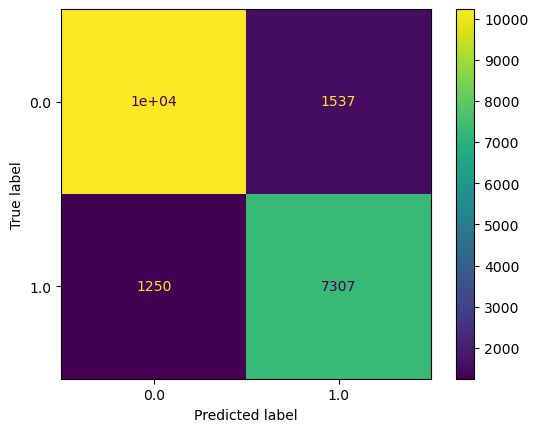

In [16]:
predict_results(lr_model, X_train_resampled, X_valid, y_train_resampled, y_valid)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
param_grid2 = {
    # 'n_estimators':range(100, 300, 500),
    'max_depth': [None, 3, 5, 7, 10, 15],
    'min_samples_split': range(2, 5, 10),
    'min_samples_leaf': range(1, 2, 4),
    'criterion':["gini", "entropy"], # Критерий разбиения (gini — индекс Джини, entropy — энтропия)
}

In [19]:
grid_search = GridSearchCV(
estimator=dt_model,
param_grid=param_grid2,
cv=3, 
scoring='accuracy',
verbose=2,
n_jobs=-1,
return_train_score=True
)

grid_search.fit(X, y)

best_dt_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Лучшие параметры: {best_params}")
print(f"Лучшая кросс-валидационная точность: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Лучшие параметры: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Лучшая кросс-валидационная точность: 0.9503


In [18]:
dt_model = DecisionTreeClassifier(
    criterion="entropy",         # Критерий разбиения (gini — индекс Джини, entropy — энтропия)
    max_depth=15,              # Максимальная глубина дерева (чтобы избежать переобучения)
    min_samples_split=2,      # Минимальное количество объектов в узле для разбиения
    min_samples_leaf=1,       # Минимальное количество объектов в листе (более 1 → сглаживание)
    max_features=None,        # Количество признаков при разбиении (None — все, auto — sqrt(n_features))
    min_impurity_decrease=0.0,# Минимальное уменьшение impurity для разбиения (чем выше, тем меньше узлов)
    random_state=42           # Фиксация случайности для воспроизводимости
)

In [23]:
feature_importance = dt_model.feature_importances_

In [24]:
importance_df = pd.DataFrame({
    'Признак': X_train.columns,
    'Важность': feature_importance
})

# Сортировка по убыванию важности
importance_df = importance_df.sort_values('Важность', ascending=False)

# Вывод таблицы
print("Важность признаков:")
print(importance_df.to_string(index=False))

Важность признаков:
                          Признак  Важность
                  Online boarding  0.303356
            Inflight wifi service  0.200406
           Type_of_Travel_encoded  0.153045
                    Class_encoded  0.075033
            Customer_Type_encoded  0.054250
           Inflight entertainment  0.052611
                  Checkin service  0.023210
                 Baggage handling  0.019035
                              Age  0.018790
                    Gate location  0.016707
                 Inflight service  0.015751
                  Flight Distance  0.011774
                     Seat comfort  0.011328
                      Cleanliness  0.006966
                 On-board service  0.006222
         Arrival Delay in Minutes  0.005974
Departure/Arrival time convenient  0.005764
                 Leg room service  0.004592
                   Food and drink  0.003347
           Ease of Online booking  0.003202
       Departure Delay in Minutes  0.003074
            

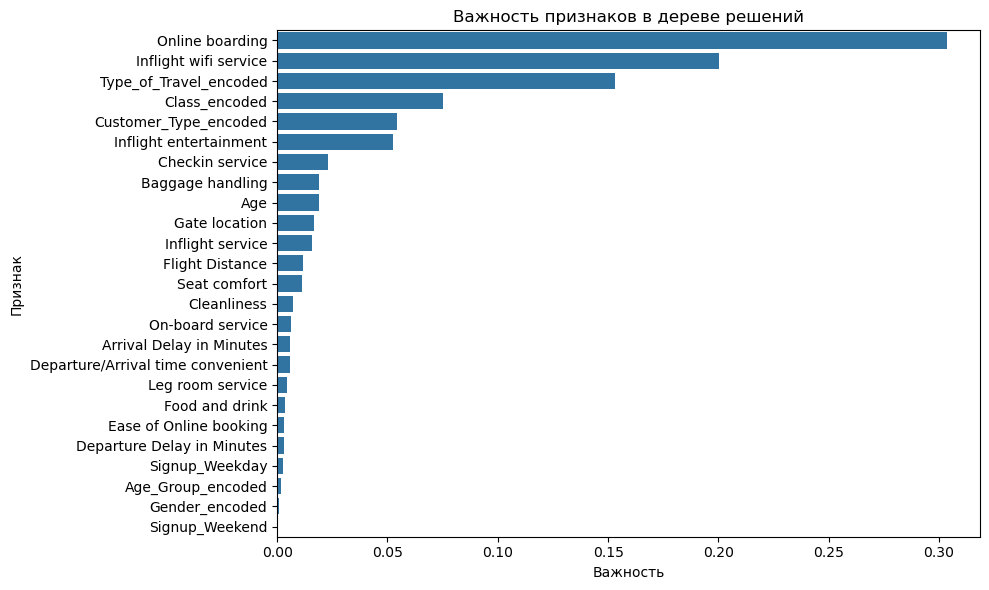

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Важность', y='Признак', data=importance_df)
plt.title('Важность признаков в дереве решений')
plt.tight_layout()
plt.show()

Accuracy: 0.9494, Precision: 0.9502, Recall: 0.9284, F1-score: 0.9392


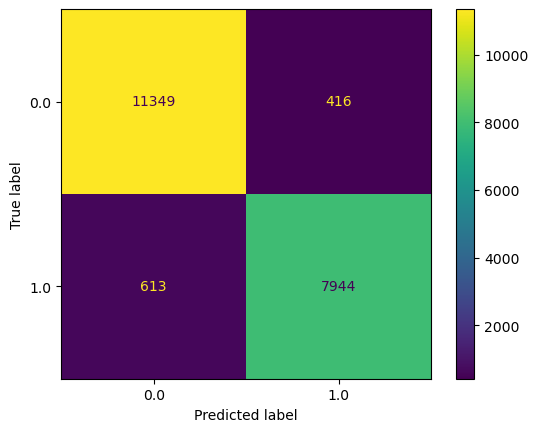

In [26]:
predict_results(dt_model, X_train, X_valid, y_train, y_valid)

Accuracy: 0.9445, Precision: 0.9339, Recall: 0.9344, F1-score: 0.9342


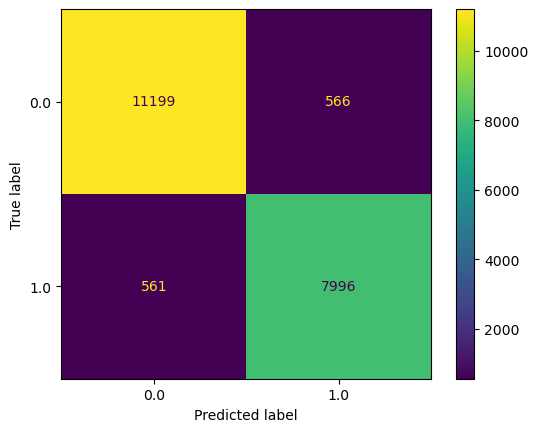

In [27]:
predict_results(dt_model, X_train_resampled, X_valid, y_train_resampled, y_valid)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn_model = KNeighborsClassifier(
    n_neighbors=10,       # Количество ближайших соседей (чем больше, тем более сглаженное решение)
    metric="manhattan",  # Метрика расстояния (euclidean, manhattan, minkowski, cosine)
    weights="distance",   # Веса соседей (uniform — все равны, distance — ближние важнее)
)

In [41]:
# param_grid3 = {
#     'knn_model__n_neighbors': [3, 5, 10, 12, 20],
#     'knn_model__metric': ["euclidean", "manhattan"],
#     'knn_model__weights': ["uniform", "distance"]
# }

In [42]:
# pipe = Pipeline([
#     ('scaler', StandardScaler()),
#     ('knn_model', KNeighborsClassifier())
# ])

In [43]:
# grid_search3 = GridSearchCV(
#     estimator=pipe,
#     param_grid=param_grid3,
#     cv=3, 
#     scoring='accuracy',
#     verbose=2,
#     n_jobs=-1,
#     return_train_score=True
# )

# grid_search3.fit(X, y)

# best_knn_model = grid_search3.best_estimator_
# best_params = grid_search3.best_params_
# print(f"Лучшие параметры: {best_params}")
# print(f"Лучшая кросс-валидационная точность: {grid_search3.best_score_:.4f}")

Accuracy: 0.8198, Precision: 0.8022, Recall: 0.7591, F1-score: 0.7801


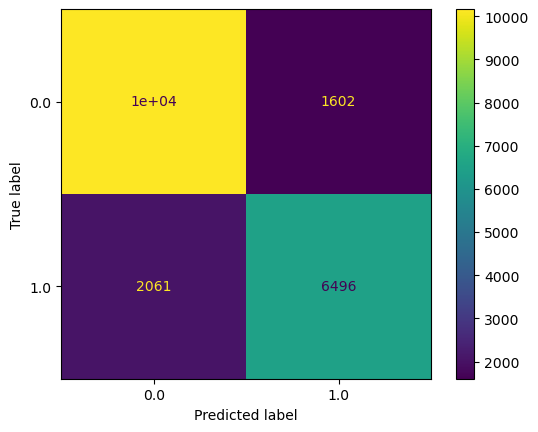

In [44]:
predict_results(knn_model, X_train, X_valid, y_train, y_valid)

Accuracy: 0.7982, Precision: 0.7331, Recall: 0.8189, F1-score: 0.7736


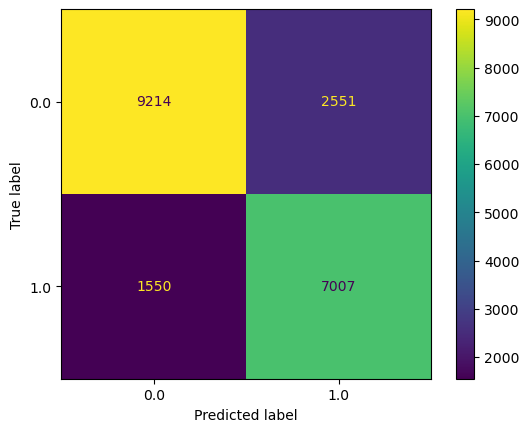

In [45]:
predict_results(knn_model, X_train_resampled, X_valid, y_train_resampled, y_valid)

In [49]:
"""Снизу вверх:
knn_model - сильно разнятся результаты модели с сэмплированием и без. Без сэмплирования результаты лучше. Гиперпараметры подбирались вручную.
dt_model - показала наилучший результат. GridSearchCV отработал, не занял слишком много времени.
lr_model - без сэплирования: 0,87, с сэмплирования 0,86. Средненько.
GridSearchCV, вероятно как-то не так были обработаны данные, потому что слишком долго проходил перебор гиперпараметров - дольше 30 минут
(я не дождалась отработки GridSearchCV для lr/dt_model)
Пыталась найти способы ускорить данную экзекуцию с помощью масштабирования, так как в интернете писали, что это может помочь. Но, вероятно, я неверно
его инициализировала."""